In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('/content/streamworks_user_data.csv')

In [83]:
df.shape

(1500, 14)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [85]:
df.isnull().sum()

,0
user_id,2
age,3
gender,1
signup_date,2
last_active_date,2
country,3
subscription_type,3
average_watch_hours,4
mobile_app_usage_pct,2
complaints_raised,3


In [86]:
df[df['user_id'].isna()]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
56,NaN,45.0,Male,16-03-25,13-07-25,UK,Basic,8.7,60.6,5.0,No,No,1.0,5.99
886,NaN,35.0,Female,16-09-23,13-07-25,USA,Basic,6.0,54.8,1.0,No,Yes,0.0,6.99


In [87]:
df.loc[[56,886], 'user_id'] = [1057, 1887]

In [88]:
df['user_id'] = df['user_id'].astype('int').astype('str').astype('category')

In [89]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%d-%m-%y')

In [90]:
df['last_active_date'] = pd.to_datetime(df['last_active_date'], format='%d-%m-%y')

In [91]:
df['monthly_fee'].isnull().sum()

np.int64(145)

In [92]:
# replacing null values in all the columns

for col in df.columns:
    if col == 'monthly_fee':
        continue

    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == 'float':
        df[col] = df[col].fillna(df[col].mean())

In [93]:
df.groupby(['subscription_type'])['monthly_fee'].mean()

,monthly_fee
subscription_type,
Basic,6.264090
Premium,14.226080
Standard,10.208679


In [94]:
# filling the missing values of monthly fee column with the mean of the corresponding subscription

mean_map = {
    'Basic': 6.264090,
    'Standard': 10.208679,
    'Premium': 14.226080
}

df.loc[df['monthly_fee'].isna(), 'monthly_fee'] = df.loc[df['monthly_fee'].isna(), 'subscription_type'].map(mean_map)

In [95]:
df = df.dropna(subset=['signup_date', 'last_active_date'])

In [96]:
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

In [97]:
df['is_loyal'] = np.where(df['tenure_days'] > 180, 1, 0)

In [98]:
df['is_churned'].value_counts()

,count
is_churned,
0.000000,1146
1.000000,349
0.234156,1


In [99]:
df[~df['is_churned'].isin([1.0, 0.0])]

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
1088,2089,43.0,Other,2024-11-13,2025-07-13,India,Basic,50.1,53.0,2.0,Yes,Yes,0.234156,5.99,242,1


In [100]:
df.loc[~df['is_churned'].isin([1.0, 0.0]), 'is_churned'] = 0.0

In [101]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())
print()

Summary Statistics:
               age                    signup_date     last_active_date  \
count  1496.000000                           1496                 1496   
mean     43.776883  2024-01-19 23:05:08.021390336  2025-07-13 00:00:00   
min      18.000000            2022-07-14 00:00:00  2025-07-13 00:00:00   
25%      31.000000            2023-04-25 18:00:00  2025-07-13 00:00:00   
50%      44.000000            2024-01-20 12:00:00  2025-07-13 00:00:00   
75%      56.000000            2024-10-28 00:00:00  2025-07-13 00:00:00   
max      69.000000            2025-07-12 00:00:00  2025-07-13 00:00:00   
std      15.062384                            NaN                  NaN   

       average_watch_hours  mobile_app_usage_pct  complaints_raised  \
count          1496.000000           1496.000000        1496.000000   
mean             39.924207             51.413789           2.497657   
min               0.500000              0.000000           0.000000   
25%              19.500000   

In [102]:
df.groupby('received_promotions')['is_churned'].value_counts()

received_promotions  is_churned
No                   0.0           572
                     1.0           192
Yes                  0.0           575
                     1.0           157
Name: count, dtype: int64

In [103]:
df.groupby('is_churned')['average_watch_hours'].mean()

,average_watch_hours
is_churned,
0.0,39.988413
1.0,39.713190


In [104]:
df.groupby((df['mobile_app_usage_pct'] > 50.0).astype(int))['is_churned'].value_counts()

mobile_app_usage_pct  is_churned
0                     0.0           545
                      1.0           161
1                     0.0           602
                      1.0           188
Name: count, dtype: int64

In [105]:
df.groupby('subscription_type')['is_churned'].value_counts()

subscription_type  is_churned
Basic              0.0           386
                   1.0           120
Premium            0.0           391
                   1.0           108
Standard           0.0           370
                   1.0           121
Name: count, dtype: int64

In [106]:
df.groupby('country')['is_churned'].value_counts()

country  is_churned
Canada   0.0           209
         1.0            56
France   0.0           193
         1.0            60
Germany  0.0           189
         1.0            55
India    0.0           196
         1.0            62
UK       0.0           175
         1.0            66
USA      0.0           185
         1.0            50
Name: count, dtype: int64

In [107]:
df.groupby('gender')['is_churned'].value_counts()

gender  is_churned
Female  0.0           375
        1.0           135
Male    0.0           377
        1.0           105
Other   0.0           395
        1.0           109
Name: count, dtype: int64

In [108]:
df.groupby(['country', 'subscription_type'])['is_churned'].value_counts()

country  subscription_type  is_churned
Canada   Basic              0.0           70
                            1.0           22
         Premium            0.0           70
                            1.0           12
         Standard           0.0           69
                            1.0           22
France   Basic              0.0           66
                            1.0           16
         Premium            0.0           71
                            1.0           24
         Standard           0.0           56
                            1.0           20
Germany  Basic              0.0           56
                            1.0           18
         Premium            0.0           68
                            1.0           18
         Standard           0.0           65
                            1.0           19
India    Basic              0.0           65
                            1.0           20
         Premium            0.0           80
                            1.0           18
         Standard           0.0           51
                            1.0           24
UK       Basic              0.0           71
                            1.0           22
         Premium            0.0           47
                            1.0           20
         Standard           0.0           57
                            1.0           24
USA      Basic              0.0           58
                            1.0           22
         Premium            0.0           55
                            1.0           16
         Standard           0.0           72
                            1.0           12
Name: count, dtype: int64

In [109]:
# Checking correlations
features = ['age', 'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised']
for feature in features:
    corr = df[feature].corr(df['is_churned'])
    print(f"{feature}: {corr:.3f}")
print()

age: 0.002
average_watch_hours: -0.005
mobile_app_usage_pct: 0.019
complaints_raised: -0.005



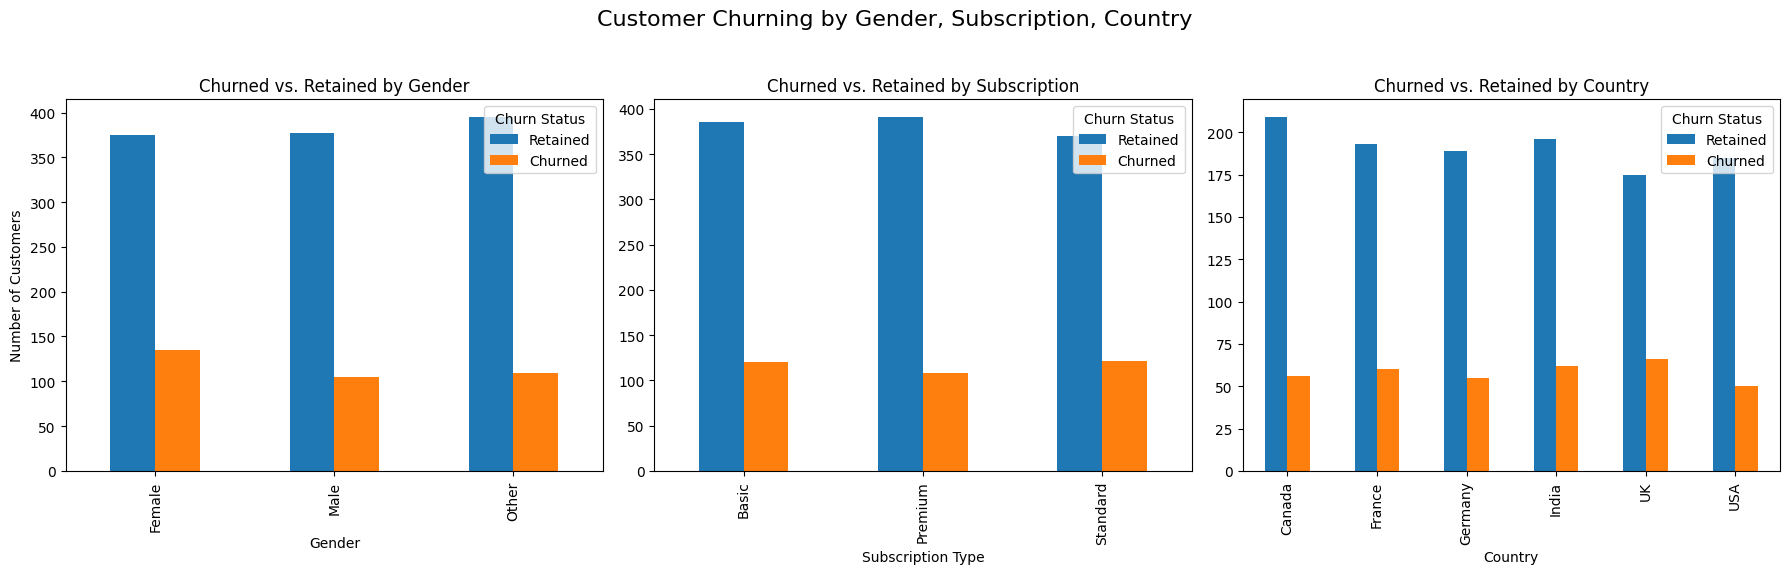

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Customer Churning by Gender, Subscription, Country', fontsize=16)

# Plot churn by gender
churn_by_gender = df.groupby('gender')['is_churned'].value_counts().unstack()
churn_by_gender.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Churned vs. Retained by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Customers')
axes[0].legend(title='Churn Status', labels=['Retained', 'Churned'])

# Plot churn by subscription
churn_by_sub = df.groupby('subscription_type')['is_churned'].value_counts().unstack()
churn_by_sub.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Churned vs. Retained by Subscription')
axes[1].set_xlabel('Subscription Type')
axes[1].set_ylabel('')
axes[1].legend(title='Churn Status', labels=['Retained', 'Churned'])

# Plot churn by country
churn_by_country = df.groupby('country')['is_churned'].value_counts().unstack()
churn_by_country.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Churned vs. Retained by Country')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('')
axes[2].legend(title='Churn Status', labels=['Retained', 'Churned'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()

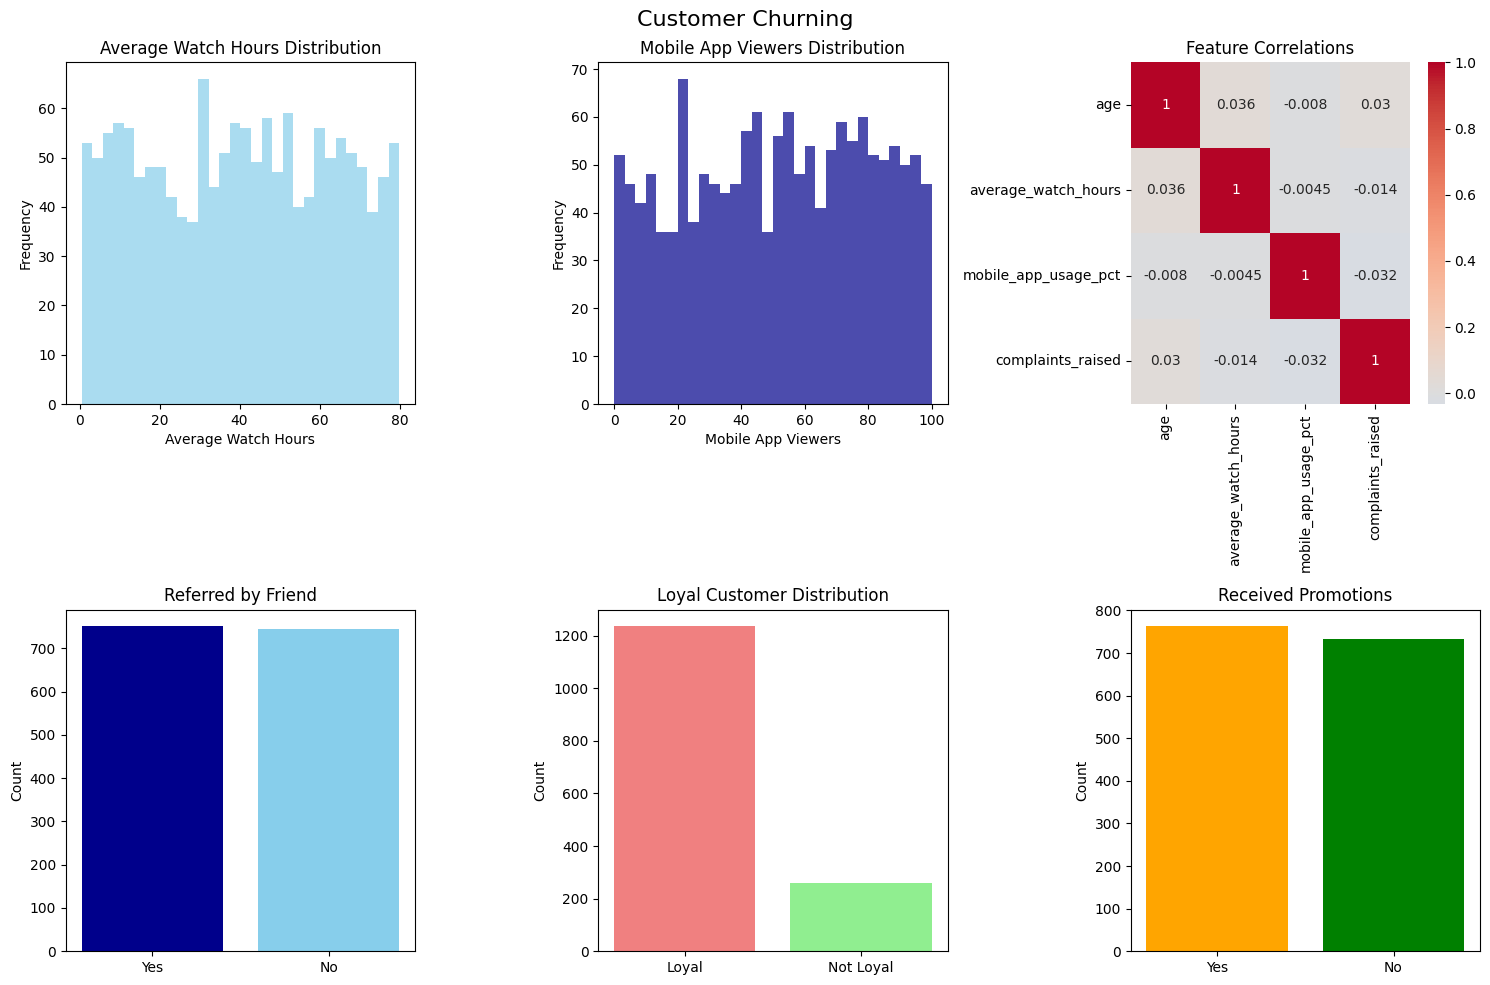

In [111]:
# Creating visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Customer Churning', fontsize=16)

# 1. Average Watch Hours Distribution
axes[0, 0].hist(df['average_watch_hours'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Average Watch Hours Distribution')
axes[0, 0].set_xlabel('Average Watch Hours')
axes[0, 0].set_ylabel('Frequency')


# 2. Mobile App Viewers Distribution
axes[0, 1].hist(df['mobile_app_usage_pct'], bins=30, alpha=0.7, color='darkblue')
axes[0, 1].set_title('Mobile App Viewers Distribution')
axes[0, 1].set_xlabel('Mobile App Viewers')
axes[0, 1].set_ylabel('Frequency')


# 3. Correlation Heatmap
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 2])
axes[0, 2].set_title('Feature Correlations')


# 4. Customers Referred by friend
refrred_customer_counts = df['referred_by_friend'].value_counts()
axes[1, 0].bar(['Yes', 'No'], refrred_customer_counts.values, color=['darkblue', 'skyblue'])
axes[1, 0].set_title('Referred by Friend')
axes[1, 0].set_ylabel('Count')


# 5. High Value Customer Distribution
loyal_customer_counts = df['is_loyal'].value_counts()
axes[1, 1].bar(['Loyal', 'Not Loyal'], loyal_customer_counts.values, color=['lightcoral', 'lightgreen'])
axes[1, 1].set_title('Loyal Customer Distribution')
axes[1, 1].set_ylabel('Count')


# 6. Customers Received Promotions
promotion_customer_counts = df['received_promotions'].value_counts()
axes[1, 2].bar(['Yes', 'No'], promotion_customer_counts.values, color=['orange', 'green'])
axes[1, 2].set_title('Received Promotions')
axes[1, 2].set_ylabel('Count')


plt.tight_layout()
plt.show()

In [112]:
# Chi-square test

from scipy.stats import chi2_contingency

categorical_vars = ['gender', 'received_promotions', 'referred_by_friend']

for col in categorical_vars:
    contingency = pd.crosstab(df[col], df['is_churned'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}:")
    print(f"Chi2 = {chi2:.3f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Relationship with churn\n")
    else:
        print("No relationship with churn\n")


gender:
Chi2 = 4.273, p-value = 0.1180
No relationship with churn

received_promotions:
Chi2 = 2.633, p-value = 0.1047
No relationship with churn

referred_by_friend:
Chi2 = 0.719, p-value = 0.3966
No relationship with churn



In [113]:
from scipy.stats import ttest_ind

# Split data into two groups
churned = df[df['is_churned'] == 1]['average_watch_hours']
retained = df[df['is_churned'] == 0]['average_watch_hours']

# Perform independent t-test
t_stat, p_val = ttest_ind(churned, retained, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference in watch time between churned and retained users")
else:
    print("No significant difference in watch time between churned and retained users")


T-statistic: -0.194, p-value: 0.8460
No significant difference in watch time between churned and retained users


In [114]:
# Label encoding for binary categorical columns

from sklearn.preprocessing import LabelEncoder

binary_cols = ['received_promotions', 'referred_by_friend']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [115]:
# One Hot encoding for multiple category columns

df = pd.get_dummies(df, columns=['gender', 'country', 'subscription_type'], drop_first=True)

In [116]:
df.head()

,user_id,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,...,is_loyal,gender_Male,gender_Other,country_France,country_Germany,country_India,country_UK,country_USA,subscription_type_Premium,subscription_type_Standard
0,1001,56.0,2025-04-02,2025-07-13,42.6,77.4,1.0,0,0,1.0,...,0,False,True,True,False,False,False,False,False,True
1,1002,69.0,2023-01-02,2025-07-13,65.3,98.0,4.0,0,1,1.0,...,1,True,False,False,False,True,False,False,False,False
2,1003,46.0,2022-08-21,2025-07-13,40.1,47.8,0.0,0,1,1.0,...,1,True,False,False,False,False,True,False,True,False
3,1004,32.0,2023-09-14,2025-07-13,5.8,53.2,1.0,1,1,1.0,...,1,False,True,False,True,False,False,False,True,False
4,1005,60.0,2023-07-29,2025-07-13,32.7,16.8,5.0,0,1,0.0,...,1,False,False,False,False,True,False,False,False,True


**Logistic Regression**

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [118]:
#  Defining features (X) and target (y)

X = df.drop(columns=['is_churned', 'signup_date', 'last_active_date', 'user_id'])
y = df['is_churned']

In [119]:
# Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
# Scaling features using Standard Scalar

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# Fit Logistic Regression model

log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [122]:
# train Model

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [123]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

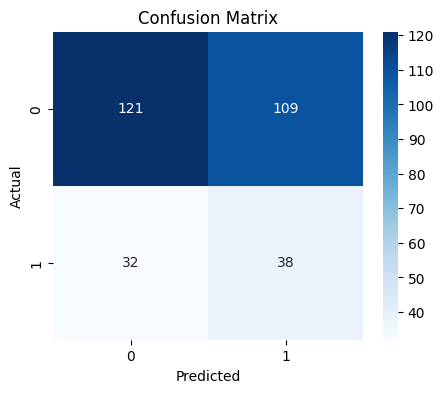

In [124]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [125]:
print(classification_report(y_test, y_pred, target_names=['Retained','Churned']))

              precision    recall  f1-score   support

    Retained       0.79      0.53      0.63       230
     Churned       0.26      0.54      0.35        70

    accuracy                           0.53       300
   macro avg       0.52      0.53      0.49       300
weighted avg       0.67      0.53      0.57       300



In [126]:
coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)

print("Top predictors of churn:")
print(coefficients.head(10))

Top predictors of churn:
gender_Other                 -0.184420
monthly_fee                  -0.132569
is_loyal                      0.106049
received_promotions          -0.102088
subscription_type_Premium     0.101420
gender_Male                  -0.088413
country_France                0.072362
country_India                 0.071815
country_UK                    0.069946
subscription_type_Standard    0.066793
dtype: float64
